## Selecting the relevant metric in classification

#### Select the relevant metric for classification problems in order to compare multiple models performance

#### Tags:
    Data: labeled data, Kaggle competition
    Technologies: python, pandas, scikit-learn
    Techniques: selecting the relevant metric for calssification 
    
#### Resources:
[UCI Machine Learning Repository - Default of Credit Clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#)

[ROC curve and AUC](https://www.youtube.com/watch?v=OAl6eAyP-yo)


## Classification metrics for model evaluation

The metrics for classification are more elaborate than for regression. The main idea is comparing the predictions with acutal classes where usually the rows are the actual class while the columns are the predicted class. In the simplest classification task where the class is binary we have 4 cells in the confusion matrix, true positive, false negative, false positive and false negative. The perfect classifier would have only values on the main diagonal.

An example of the below confusion matrix can be found here:
[Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

![title](confusion-matrix.png)

Hence the main metrics are:

1. Accuracy - has issues with the skewed datasets, where there is a low probability of a certain class
2. Precision - is the accuracy of the positive predictions
3. Recall - sensitivity or TPR is the proportion of positive istances that are correctly detected by the classifier
4. TNR - specificty or TNR is the ration of negative instances that are correctly predicted as negative
5. FPR - false positive rate, ratio of false positive instances out of all negative instances

Increasing precision decreases recall and vice-versa. Depending on the type of problem we are trying to solve we can prefer higer precision or higher recall. We can plot the Precision / Recall graph for different levels of precision and recall to understand the behavior of the model and pick the balance that suits our needs best.

Finally the usually used metric in evaluating classification models is Area under the Curve (AUC), that comes from the ROC curve. ROC curve plots TPR (Recall) against FPR for each threshold of the TPR. As this metric is also available in the Scikit-learn library we will use it to compare different classification models.

Lets take a closer look in Python. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

%matplotlib inline

In [2]:
# import the relevant dataset
df = pd.read_excel('../data/default-of-credit-card-clients.xls',skiprows=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [3]:
df = pd.get_dummies(df,columns=['SEX','EDUCATION','MARRIAGE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                

##### There are 30000 observations and there are all numeric in character 

In [5]:
X = df.drop(['ID','default payment next month'],axis=1)

y = df['default payment next month']

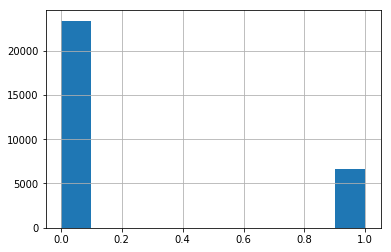

In [16]:
df["default payment next month"].hist()

In [27]:
counts = df["default payment next month"].value_counts()
counts[0]

23364

In [31]:
prop_defaulted = counts[1] / counts.sum()
print('Proportion of defaulted in the dataset: {}'.format(prop_defaulted))

Proportion of defaulted in the dataset: 0.2212


In [32]:
# split the data into the trainging and evaluation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# prepare the parameters for the grid search for each of the classifiers

modelnames = ['LR', 'KNN', 'SVM', 'RF', 'GB']

models = {'LR':LogisticRegression(random_state=42, solver='liblinear'),
         'KNN':KNeighborsClassifier(),
         'SVM':SVC(random_state=42, gamma='auto'),
         'RF':RandomForestClassifier(random_state=42, n_estimators=100),
         'GB':GradientBoostingClassifier(random_state=42)}


In [34]:
results = {}

for m in models:
      
    model = models[m]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, list(y_pred))
    acc_score = accuracy_score(y_test, y_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    
    auc_score = auc(fpr, tpr)
    
    results[m] = {'Model':m, 'accuracy':acc_score, 'auc':auc_score}
    

In [13]:
results

{'LR': {'Model': 'LR', 'accuracy': 0.781, 'auc': 0.4998933219543418},
 'KNN': {'Model': 'KNN', 'accuracy': 0.756, 'auc': 0.5502308974394181},
 'SVM': {'Model': 'SVM', 'accuracy': 0.781, 'auc': 0.5037311316761323},
 'RF': {'Model': 'RF',
  'accuracy': 0.8151666666666667,
  'auc': 0.6519737225893076},
 'GB': {'Model': 'GB', 'accuracy': 0.8195, 'auc': 0.6528284469155258}}

## Conclusions

As the AUC of the Gradient Boositing Classifier has the highest AUC of 0.65 it is the best out of the box model that we attempted with the data that we had. LR and SVM are both very close to AUC of 0.5 which would be unusable as it would be the same as random guessing. This is due to the fact that we have a disbalance in the classes and the LR model simply predicts that none of the credit card defaults will happen. When we look at the accuracy of the LR we can see that it is at a decent 0.781, so by looking at accuracy only we could make a wrong conclusion (the main reason why we do not use only accuracy to compare model performances). The first 3 models suffer from oversimplification of the model and we should be looking into hyperparameter tuning in order to find the better performing model. 